## Name : - Siddhartha Seelam
## Task 5 : - Exploratory Data Analysis - Sports(IPL)
## To Perform ‘Exploratory Data Analysis’ on dataset ‘Indian Premier League’ &
## To find out: 
### - The most successful teams & players
### - Factors that contributing win or loss of a team.

### __ Importing Libraries __

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## __ Loading 1st Dataset __

In [2]:
matches = pd.read_csv("Indian Premier League/matches.csv")
matches.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


In [3]:
matches.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 756 entries, 0 to 755
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   id               756 non-null    int64 
 1   season           756 non-null    int64 
 2   city             749 non-null    object
 3   date             756 non-null    object
 4   team1            756 non-null    object
 5   team2            756 non-null    object
 6   toss_winner      756 non-null    object
 7   toss_decision    756 non-null    object
 8   result           756 non-null    object
 9   dl_applied       756 non-null    int64 
 10  winner           752 non-null    object
 11  win_by_runs      756 non-null    int64 
 12  win_by_wickets   756 non-null    int64 
 13  player_of_match  752 non-null    object
 14  venue            756 non-null    object
 15  umpire1          754 non-null    object
 16  umpire2          754 non-null    object
 17  umpire3          119 non-null    ob

## __ Loading 2nd Dataset __

In [4]:
deliveries = pd.read_csv("Indian Premier League/deliveries.csv")
deliveries.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,2,2,NaN,NaN,NaN


In [5]:
deliveries.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 179078 entries, 0 to 179077
Data columns (total 21 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   match_id          179078 non-null  int64 
 1   inning            179078 non-null  int64 
 2   batting_team      179078 non-null  object
 3   bowling_team      179078 non-null  object
 4   over              179078 non-null  int64 
 5   ball              179078 non-null  int64 
 6   batsman           179078 non-null  object
 7   non_striker       179078 non-null  object
 8   bowler            179078 non-null  object
 9   is_super_over     179078 non-null  int64 
 10  wide_runs         179078 non-null  int64 
 11  bye_runs          179078 non-null  int64 
 12  legbye_runs       179078 non-null  int64 
 13  noball_runs       179078 non-null  int64 
 14  penalty_runs      179078 non-null  int64 
 15  batsman_runs      179078 non-null  int64 
 16  extra_runs        179078 non-null  int

## __ Now, We will merge the 2 datasets for better insights from the data __

In [6]:
#merging the 2 datasets
merge = pd.merge(deliveries,matches, left_on='match_id', right_on ='id')
merge.head(2)

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN


In [7]:
merge.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 179078 entries, 0 to 179077
Data columns (total 39 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   match_id          179078 non-null  int64 
 1   inning            179078 non-null  int64 
 2   batting_team      179078 non-null  object
 3   bowling_team      179078 non-null  object
 4   over              179078 non-null  int64 
 5   ball              179078 non-null  int64 
 6   batsman           179078 non-null  object
 7   non_striker       179078 non-null  object
 8   bowler            179078 non-null  object
 9   is_super_over     179078 non-null  int64 
 10  wide_runs         179078 non-null  int64 
 11  bye_runs          179078 non-null  int64 
 12  legbye_runs       179078 non-null  int64 
 13  noball_runs       179078 non-null  int64 
 14  penalty_runs      179078 non-null  int64 
 15  batsman_runs      179078 non-null  int64 
 16  extra_runs        179078 non-null  int

In [8]:
matches.id.is_unique

True

#### Note: 
* since id is unique we can set this as our index

In [9]:
matches.set_index('id', inplace=True)

In [10]:
#Summary statistics of matches data
matches.describe(include = 'all')

,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
count,756.000000,749,756,756,756,756,756,756,756.000000,752,756.000000,756.000000,752,756,754,754,119
unique,NaN,32,546,15,15,15,2,3,NaN,15,NaN,NaN,226,41,61,65,25
top,NaN,Mumbai,2010-03-28,Mumbai Indians,Kolkata Knight Riders,Mumbai Indians,field,normal,NaN,Mumbai Indians,NaN,NaN,CH Gayle,Eden Gardens,HDPK Dharmasena,S Ravi,O Nandan
freq,NaN,101,2,101,95,98,463,743,NaN,109,NaN,NaN,21,77,73,57,10
mean,2013.444444,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.025132,NaN,13.283069,3.350529,NaN,NaN,NaN,NaN,NaN
std,3.366895,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.156630,NaN,23.471144,3.387963,NaN,NaN,NaN,NaN,NaN
min,2008.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN
25%,2011.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN
50%,2013.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,0.000000,4.000000,NaN,NaN,NaN,NaN,NaN
75%,2016.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,19.000000,6.000000,NaN,NaN,NaN,NaN,NaN


## __ Data Preprocessing __

Here we will perform Data Preprocessing on our matches dataset first, to make the data usable for EDA.

In [11]:
matches.head()

,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
id,,,,,,,,,,,,,,,,,
1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


From Pre profiling, we found that:

- city has missing values

- team1 and team2 columns have 14 distinct values but winner has 15 distinct values

- umpire1 and umpire2 have 1 missing value each

- umpire3 has 94% missing values

- city has 33 distinct values while venue has 35 distinct values

In [12]:
#Filling in the missing values of city column
#First let's find the venues corresponding to which the values of city are empty

matches[matches.city.isnull()][['city','venue']]

,city,venue
id,,
462,NaN,Dubai International Cricket Stadium
463,NaN,Dubai International Cricket Stadium
467,NaN,Dubai International Cricket Stadium
469,NaN,Dubai International Cricket Stadium
470,NaN,Dubai International Cricket Stadium
475,NaN,Dubai International Cricket Stadium
477,NaN,Dubai International Cricket Stadium


In [13]:
#So, missing values can be filled with Dubai
matches.city = matches.city.fillna('Dubai')

In [14]:
#umpire1 and umpire2 columns have one missing value each

matches[(matches.umpire1.isnull()) | (matches.umpire2.isnull())]

,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
id,,,,,,,,,,,,,,,,,
5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN
11413,2019,Visakhapatnam,08/05/19,Sunrisers Hyderabad,Delhi Capitals,Delhi Capitals,field,normal,0,Delhi Capitals,0,2,RR Pant,ACA-VDCA Stadium,NaN,NaN,NaN


In [15]:
#umpire3 column has close to 92% missing values. hence dropping that column

matches = matches.drop('umpire3', axis = 1)

In [16]:
#city has 33 distinct values while we have 35 venues.
#Let's find out venues grouped by cities to see which cities have multiple venues

city_venue = matches.groupby(['city','venue']).count()['season']
city_venue_df = pd.DataFrame(city_venue)
city_venue_df

season
city           venue                                                     
Abu Dhabi      Sheikh Zayed Stadium                                     7
Ahmedabad      Sardar Patel Stadium, Motera                            12
Bangalore      M Chinnaswamy Stadium                                   66
Bengaluru      M Chinnaswamy Stadium                                    7
               M. Chinnaswamy Stadium                                   7
Bloemfontein   OUTsurance Oval                                          2
Cape Town      Newlands                                                 7
Centurion      SuperSport Park                                         12
Chandigarh     Punjab Cricket Association IS Bindra Stadium, M...      11
               Punjab Cricket Association Stadium, Mohali              35
Chennai        M. A. Chidambaram Stadium                                8
               MA Chidambaram Stadium, Chepauk                         49
Cuttack        Barabati Stadium                                         7
Delhi          Feroz Shah Kotla                                        67
               Feroz Shah Kotla Ground                                  7
Dharamsala     Himachal Pradesh Cricket Association Stadium             9
Dubai          Dubai International Cricket Stadium                      7
Durban         Kingsmead                                               15
East London    Buffalo Park                                             3
Hyderabad      Rajiv Gandhi International Stadium, Uppal               56
               Rajiv Gandhi Intl. Cricket Stadium                       8
Indore         Holkar Cricket Stadium                                   9
Jaipur         Sawai Mansingh Stadium                                  47
Johannesburg   New Wanderers Stadium                                    8
Kanpur         Green Park                                               4
Kimberley      De Beers Diamond Oval                                    3
Kochi          Nehru Stadium                                            5
Kolkata        Eden Gardens                                            77
Mohali         IS Bindra Stadium                                        7
               Punjab Cricket Association IS Bindra Stadium, M...       3
Mumbai         Brabourne Stadium                                       11
               Dr DY Patil Sports Academy                              17
               Wankhede Stadium                                        73
Nagpur         Vidarbha Cricket Association Stadium, Jamtha             3
Port Elizabeth St George's Park                                         7
Pune           Maharashtra Cricket Association Stadium                 21
               Subrata Roy Sahara Stadium                              17
Raipur         Shaheed Veer Narayan Singh International Stadium         6
Rajkot         Saurashtra Cricket Association Stadium                  10
Ranchi         JSCA International Stadium Complex                       7
Sharjah        Sharjah Cricket Stadium                                  6
Visakhapatnam  ACA-VDCA Stadium                                         2
               Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket Sta...      11

#### Observations

- Bengaluru and Bangalore both are in the data when they are same. So we need to keep one of them
- Chandigarh and Mohali are same and there is just one stadium Punjab Cricket Association IS Bindra Stadium, Mohali whose value has not been entered correctly. We need to have either Chandigarh or Mohali as well as correct name of the stadium there
- Mumbai has 3 stadiums/venues used for IPL
- Pune has 2 venues for IPL

## __ Visual representation of number of venues in each city __

(array([  0.,  20.,  40.,  60.,  80., 100., 120.]),
 <a list of 7 Text major ticklabel objects>)

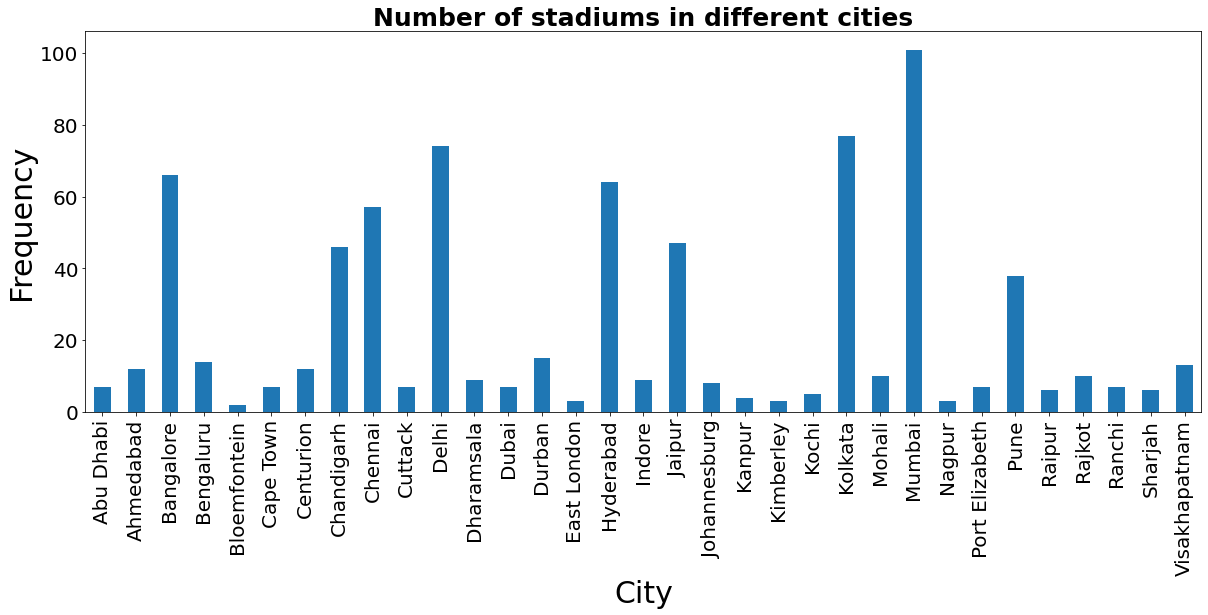

In [17]:
#Plotting venues along with cities 
v = pd.crosstab(matches['city'],matches['venue'])
v.replace(v[v!=0],1, inplace = True)

#Adding a column by summing each columns
v['count'] = v.sum(axis = 'columns')
#We will just keep last column = 'count'
b = v['count']

#Plotting
plt.figure(figsize = (20,7))
b.plot(kind = 'bar')
plt.title("Number of stadiums in different cities", fontsize = 25, fontweight = 'bold')
plt.xlabel("City", size = 30)
plt.ylabel("Frequency", size = 30)
plt.xticks(size = 20)
plt.yticks(size = 20)

## Exploratory Data Analysis:

## __ Number of matches played in each season __

(array([ 0., 10., 20., 30., 40., 50., 60., 70., 80.]),
 <a list of 9 Text major ticklabel objects>)

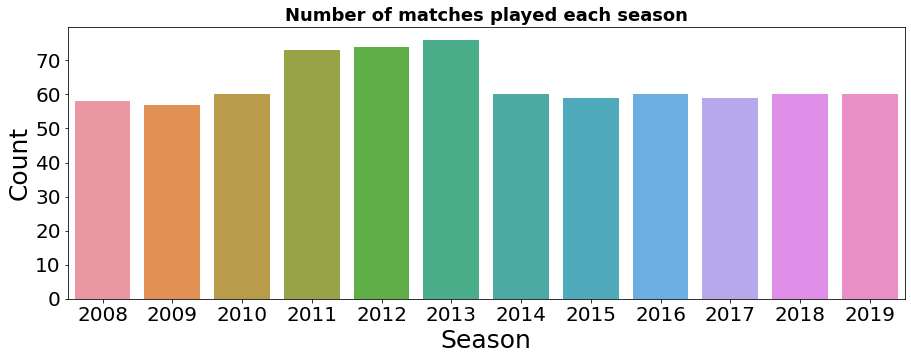

In [18]:
plt.figure(figsize=(15,5))
sns.countplot('season', data = matches)
plt.title("Number of matches played each season",fontsize=18,fontweight="bold")
plt.ylabel("Count", size = 25)
plt.xlabel("Season", size = 25)
plt.xticks(size = 20)
plt.yticks(size = 20)

- 2011-2013 have more matches being played than other seasons

- All other seasons have approximately 58-60 matches while 2011-2013 have more than 70 matches.


## How many teams played in each season?

(array([ 0.,  2.,  4.,  6.,  8., 10., 12.]),
 <a list of 7 Text major ticklabel objects>)

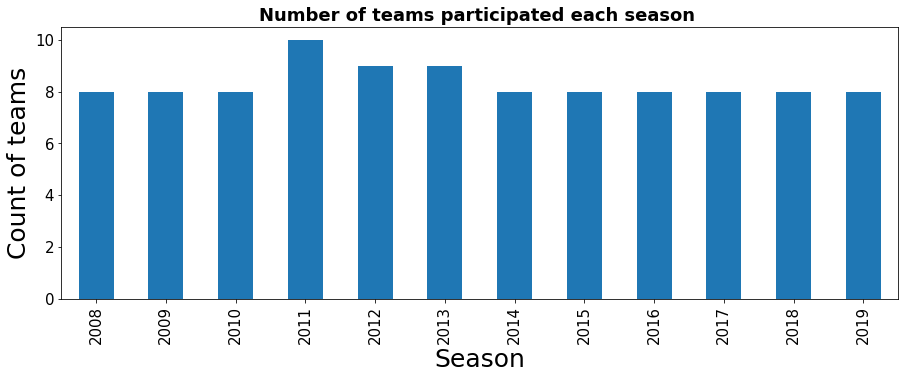

In [19]:
matches.groupby('season')['team1'].nunique().plot(kind = 'bar', figsize=(15,5))
plt.title("Number of teams participated each season ",fontsize=18,fontweight="bold")
plt.ylabel("Count of teams", size = 25)
plt.xlabel("Season", size = 25)
plt.xticks(size = 15)
plt.yticks(size = 15)

- 10 teams played in 2011 and 9 teams each in 2012 and 2013

- This explains why 2011-2013 have seen more matches being played than other seasons

## __ Venue which has hosted most number of IPL matches __

Text(0.5, 0, 'Frequency')

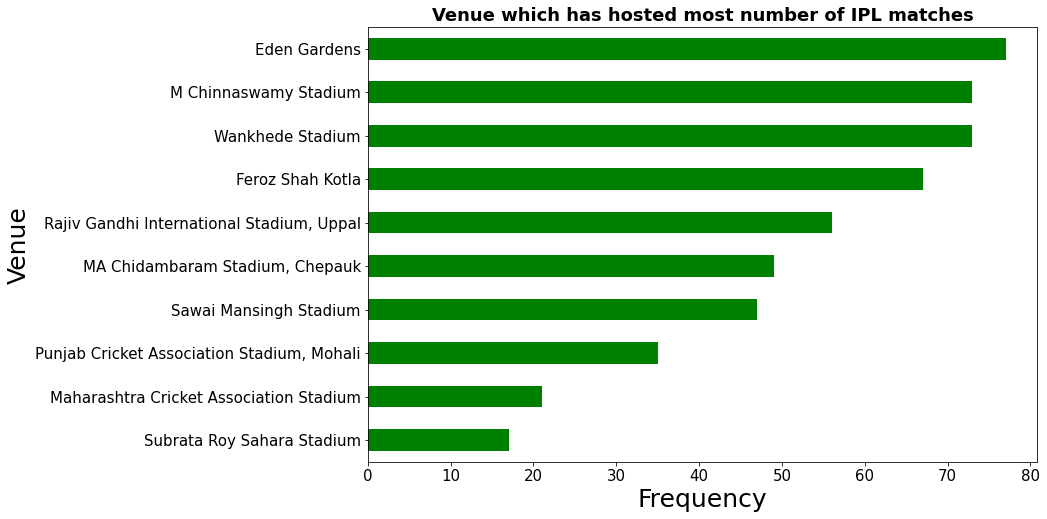

In [20]:
matches.venue.value_counts().sort_values(ascending = True).tail(10).plot(kind = 'barh',figsize=(12,8), fontsize=15, color='green')
plt.title("Venue which has hosted most number of IPL matches",fontsize=18,fontweight="bold")
plt.ylabel("Venue", size = 25)
plt.xlabel("Frequency", size = 25)

* M Chinnaswamy Stadium in Bengaluru has hosted the highest number of matches so far in IPL followed by Eden Gardens in Kolkata

## Which team has maximum wins in IPL so far?

In [21]:
#creating a dataframe with season and winner columns
winning_teams = matches[['season','winner']]

#dictionaries to get winners to each season
winners_team = {}
for i in sorted(winning_teams.season.unique()):
    winners_team[i] = winning_teams[winning_teams.season == i]['winner'].tail(1).values[0]
    
winners_of_IPL = pd.Series(winners_team)
winners_of_IPL = pd.DataFrame(winners_of_IPL, columns=['team'])

(array([0, 1, 2, 3, 4, 5]), <a list of 6 Text major ticklabel objects>)

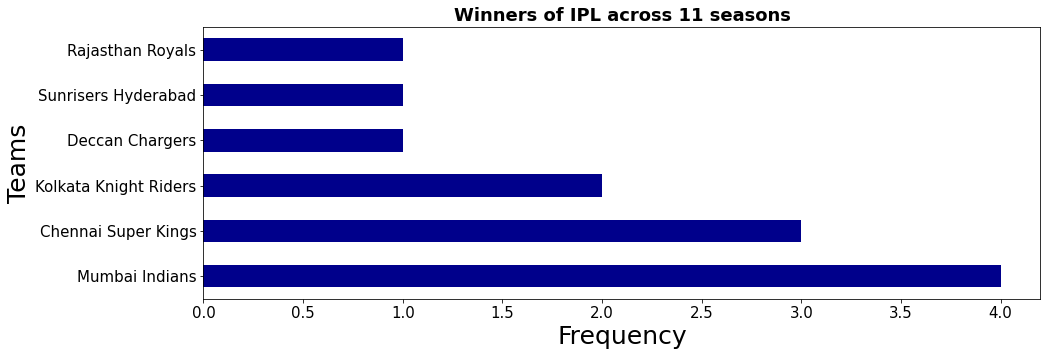

In [22]:
winners_of_IPL['team'].value_counts().plot(kind = 'barh', figsize = (15,5), color = 'darkblue')
plt.title("Winners of IPL across 11 seasons",fontsize=18,fontweight="bold")
plt.ylabel("Teams", size = 25)
plt.xlabel("Frequency", size = 25)
plt.xticks(size = 15)
plt.yticks(size = 15)

- MI and CSK have both won 3 times each followed by KKR who has won 2 times.
- Hyderabad team has also won 2 matches under 2 franchise name - Deccan Chargers and Sunrisers Hyderabad

## Does teams choosed to bat or field first, after winning toss?

Text(0.5, 1.0, 'Decision taken by captains after winning tosses')

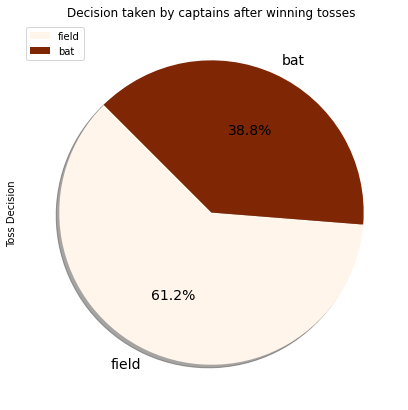

In [23]:
matches['toss_decision'].value_counts().plot(kind='pie', fontsize=14, autopct='%3.1f%%', 
                                               figsize=(10,7), shadow=True, startangle=135, legend=True, cmap='Oranges')

plt.ylabel('Toss Decision')
plt.title('Decision taken by captains after winning tosses')

Close to 60% times teams who have won tosses have decided to chase down

## How toss decision affects match results?

Text(0, 0.5, 'Frequency')

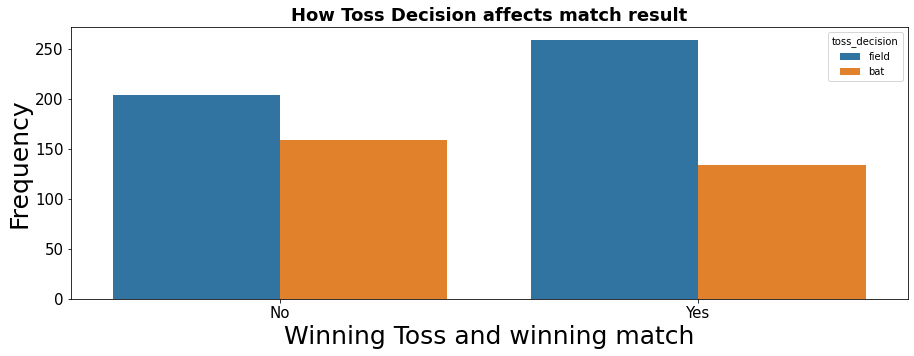

In [24]:
matches['toss_win_game_win'] = np.where((matches.toss_winner == matches.winner),'Yes','No')
plt.figure(figsize = (15,5))
sns.countplot('toss_win_game_win', data=matches, hue = 'toss_decision')
plt.title("How Toss Decision affects match result", fontsize=18,fontweight="bold")
plt.xticks(size = 15)
plt.yticks(size = 15)
plt.xlabel("Winning Toss and winning match", fontsize = 25)
plt.ylabel("Frequency", fontsize = 25)

Teams winning tosses and electng to field first have won most number of times.

## __ Individual teams decision to choose bat or field after winning toss __

Text(0, 0.5, 'Count')

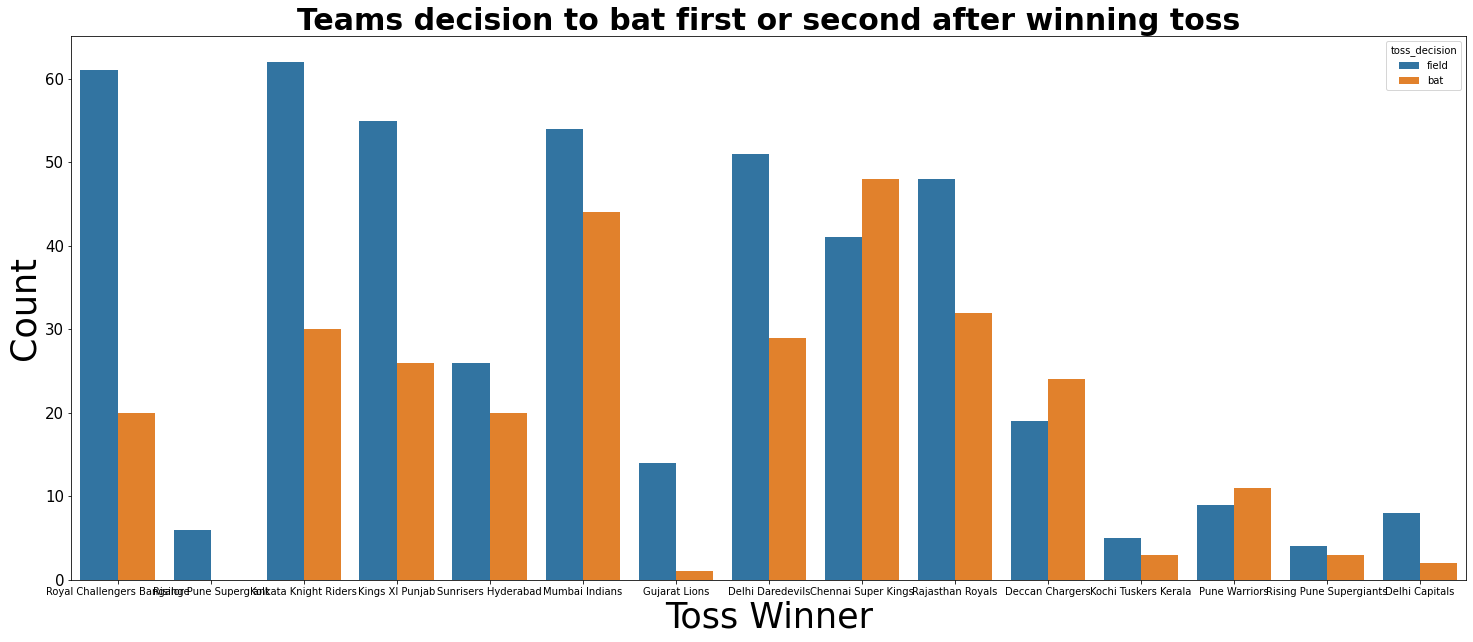

In [25]:
plt.figure(figsize = (25,10))
sns.countplot('toss_winner', data = matches, hue = 'toss_decision')
plt.title("Teams decision to bat first or second after winning toss", size = 30, fontweight = 'bold')
plt.xticks(size = 10)
plt.yticks(size = 15)
plt.xlabel("Toss Winner", size = 35)
plt.ylabel("Count", size = 35)


Most teams field first after winning toss except for Chennai Super Kings who has mostly opted to bat first. Deccan Chargers and Pune Warriors also show the same trend.

## Which player's performance has mostly led team's win?

Text(0.5, 0, 'Players')

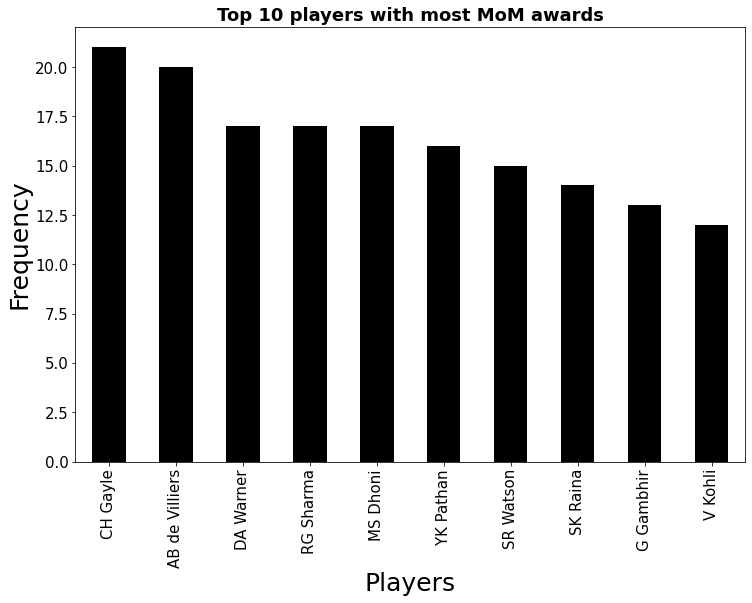

In [26]:
MoM= matches['player_of_match'].value_counts()
MoM.head(10).plot(kind = 'bar',figsize=(12,8), fontsize=15, color='black')
plt.title("Top 10 players with most MoM awards",fontsize=18,fontweight="bold")
plt.ylabel("Frequency", size = 25)
plt.xlabel("Players", size = 25)

- Chris Gayle has so far won the most number of MoM awards followed by AB de Villiers.
- Also, all top 10 are batsmen which kind of hints that in IPL batsmen have mostly dictated the matches

## How winning matches by fielding first varies across venues?

<ipython-input-27-e4ab3f734c32>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_matches['win_batting_first'] = np.where((new_matches.win_by_runs > 0), 'Yes', 'No')


Text(0, 0.5, 'Venue')

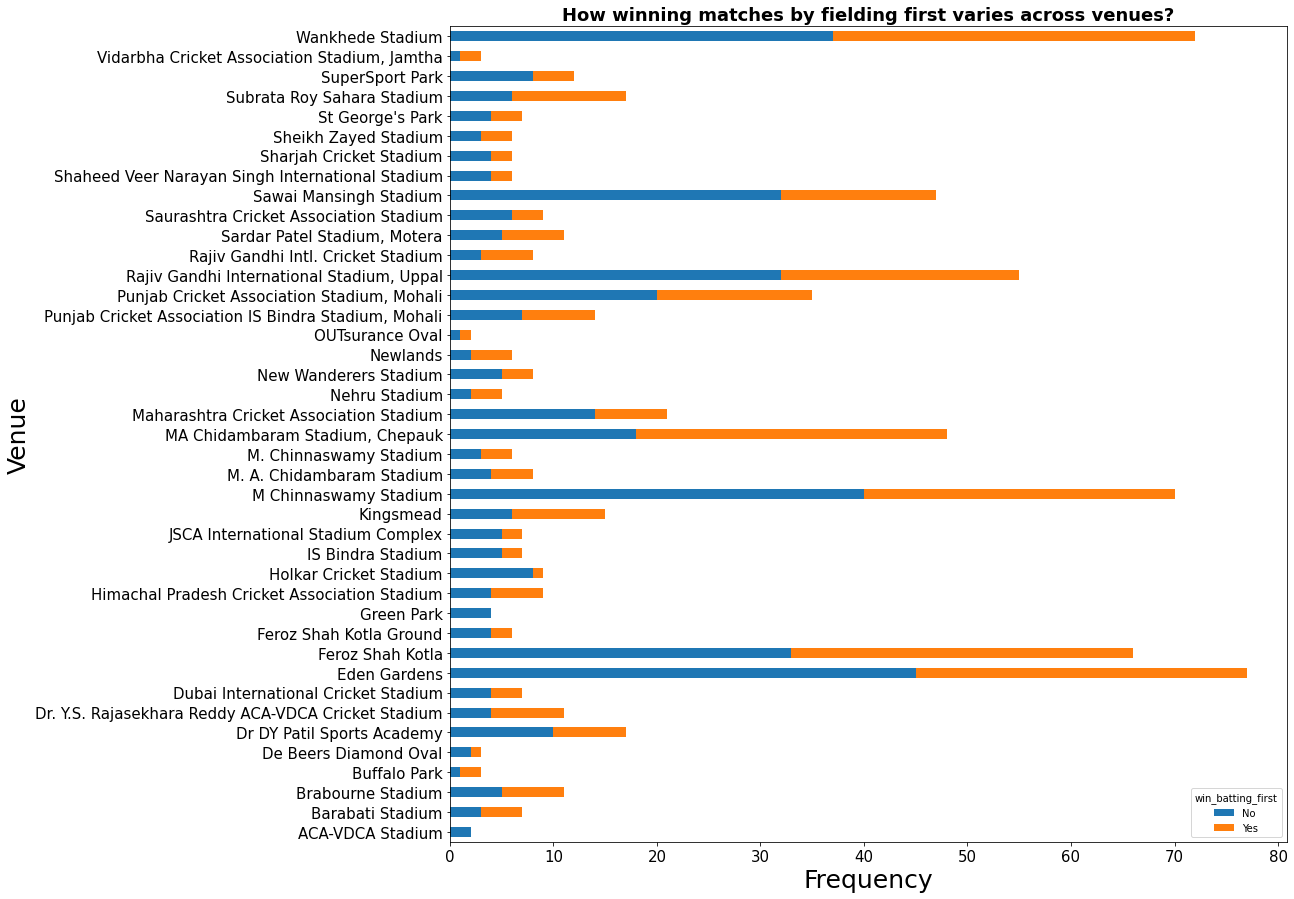

In [27]:
new_matches = matches[matches['result'] == 'normal']   #taking all those matches where result is normal and creating a new dataframe
new_matches['win_batting_first'] = np.where((new_matches.win_by_runs > 0), 'Yes', 'No')
new_matches.groupby('venue')['win_batting_first'].value_counts().unstack().plot(kind = 'barh', stacked = True,
                                                                               figsize=(15,15))
plt.title("How winning matches by fielding first varies across venues?", fontsize=18,fontweight="bold")
plt.xticks(size = 15)
plt.yticks(size = 15)
plt.xlabel("Frequency", fontsize = 25)
plt.ylabel("Venue", fontsize = 25)

Batting second has been more rewarding in almost all the venues

## Is batting second advantageous across all years?

Text(0, 0.5, 'Count')

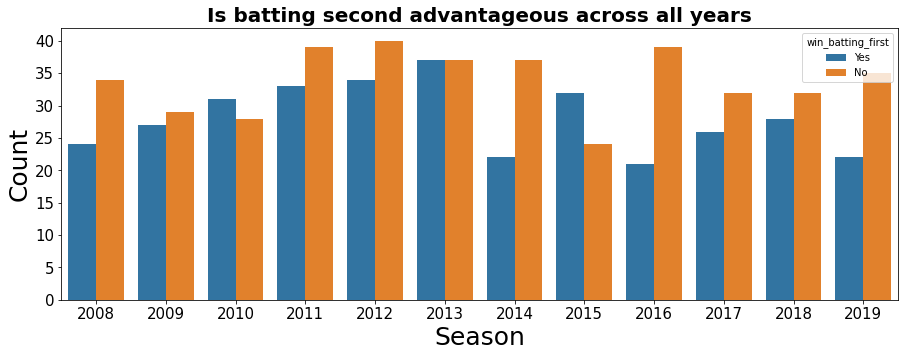

In [28]:
plt.figure(figsize = (15,5))
sns.countplot('season', data = new_matches, hue = 'win_batting_first')
plt.title("Is batting second advantageous across all years", fontsize=20,fontweight="bold")
plt.xticks(size = 15)
plt.yticks(size = 15)
plt.xlabel("Season", fontsize = 25)
plt.ylabel("Count", fontsize = 25)

Exceptt for 2010 and 2015, in all other years it can be seen that teams batting second have won more matches

## Teams total scoring runs, over the years?

(array([15000., 16000., 17000., 18000., 19000., 20000., 21000., 22000.]),
 <a list of 8 Text major ticklabel objects>)

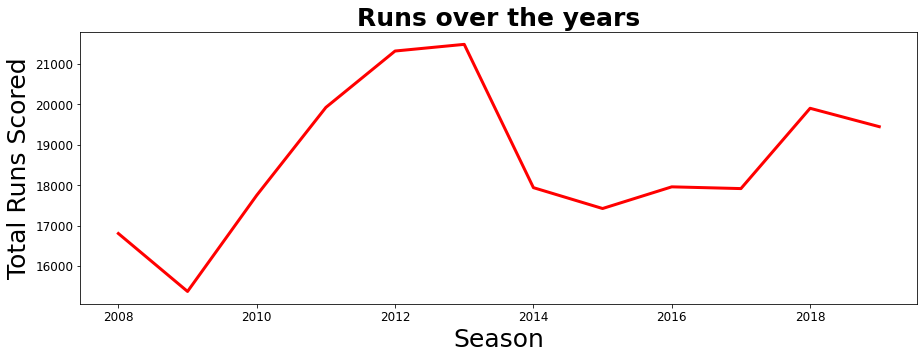

In [29]:
merge.groupby('season')['batsman_runs'].sum().plot(kind = 'line', linewidth = 3, figsize =(15,5),
                                                                                             color = 'red')
plt.title("Runs over the years",fontsize= 25, fontweight = 'bold')
plt.xlabel("Season", size = 25)
plt.ylabel("Total Runs Scored", size = 25)
plt.xticks(size = 12)
plt.yticks(size = 12)

Run scoring has gone up from the start of the IPL in 2008.

## Top Run Getters of IPL

(array([   0., 1000., 2000., 3000., 4000., 5000., 6000.]),
 <a list of 7 Text major ticklabel objects>)

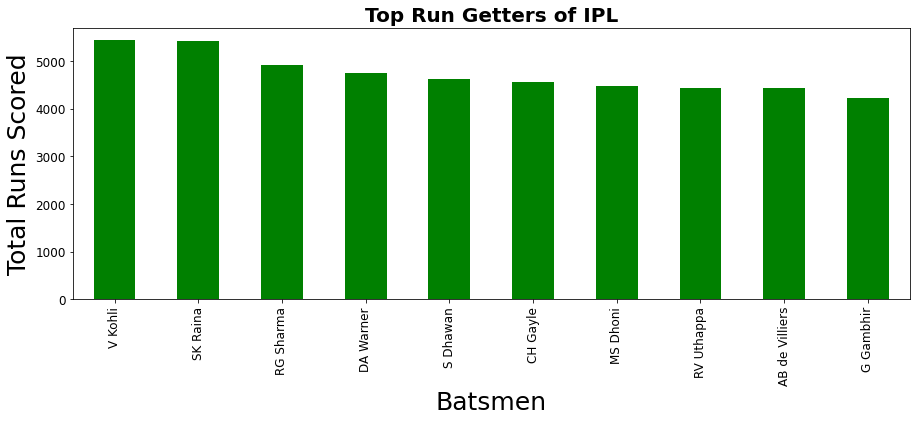

In [30]:
#let's plot the top 10 run getter so far in IPL
merge.groupby('batsman')['batsman_runs'].sum().sort_values(ascending = False).head(10).plot(kind = 'bar', color = 'green',
                                                                                            figsize = (15,5))
plt.title("Top Run Getters of IPL", fontsize = 20, fontweight = 'bold')
plt.xlabel("Batsmen", size = 25)
plt.ylabel("Total Runs Scored", size = 25)
plt.xticks(size = 12)
plt.yticks(size = 12)

- Except for MS Dhoni, all other top run getters are either openers or come in 3rd or 4th positions to bat
- Suresh Raina is the highest run getter in IPL.

## Which batsman has been most consistent among top 10 run getters?

(array([-200.,    0.,  200.,  400.,  600.,  800., 1000., 1200.]),
 <a list of 8 Text major ticklabel objects>)

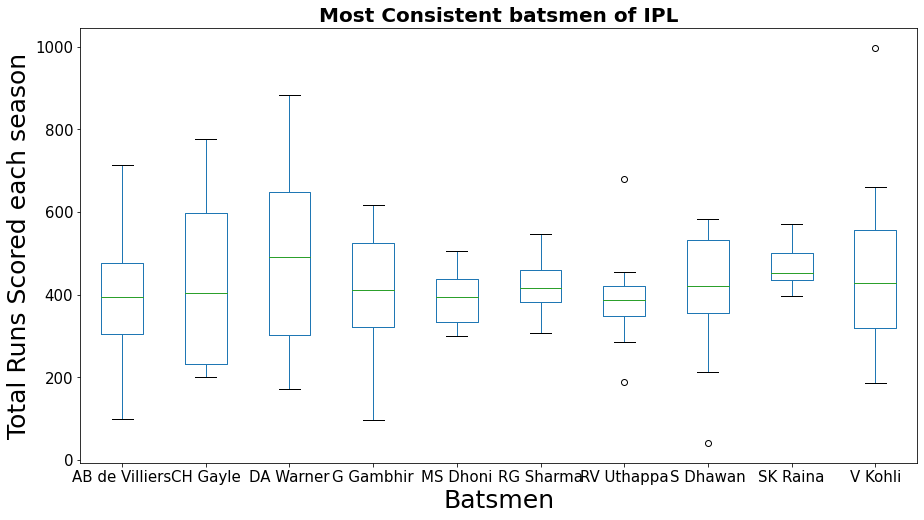

In [31]:
consistent_batsman = merge[merge.batsman.isin(['SK Raina', 'V Kohli','RG Sharma','G Gambhir',
                                            'RV Uthappa', 'S Dhawan','CH Gayle', 'MS Dhoni',
                                            'DA Warner', 'AB de Villiers'])][['batsman','season','total_runs']]

consistent_batsman.groupby(['season','batsman'])['total_runs'].sum().unstack().plot(kind = 'box', figsize = (15,8))
plt.title("Most Consistent batsmen of IPL", fontsize = 20, fontweight = 'bold')
plt.xlabel("Batsmen", size = 25)
plt.ylabel("Total Runs Scored each season", size = 25)
plt.xticks(size = 15)
plt.yticks(size = 15)

Median score for Raina is above all the top 10 run getters. He has the highest lowest run among all the batsmen across 11 seasons. Considering the highest and lowest season totals and spread of runs, it seems Raina has been most consistent among all.

## Which bowlers have performed the best?

(array([  0.,  25.,  50.,  75., 100., 125., 150., 175., 200.]),
 <a list of 9 Text major ticklabel objects>)

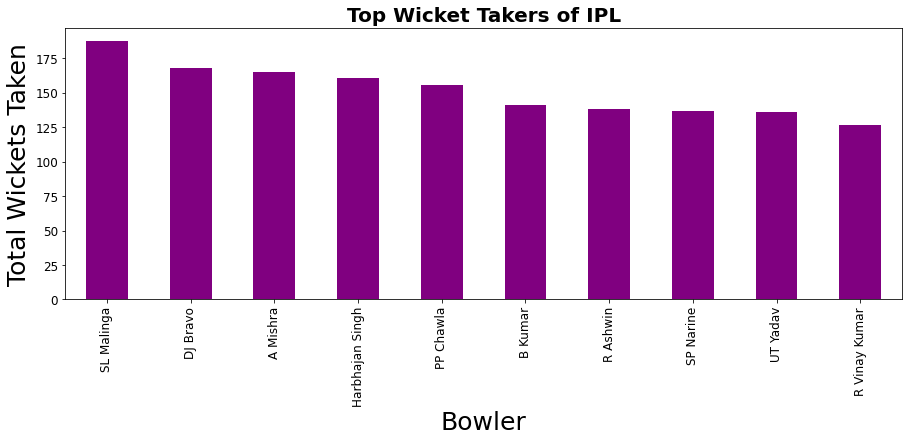

In [32]:
merge.groupby('bowler')['player_dismissed'].count().sort_values(ascending = False).head(10).plot(kind = 'bar', 
                                                color = 'purple', figsize = (15,5))
plt.title("Top Wicket Takers of IPL", fontsize = 20, fontweight = 'bold')
plt.xlabel("Bowler", size = 25)
plt.ylabel("Total Wickets Taken", size = 25)
plt.xticks(size = 12)
plt.yticks(size = 12)

- Malinga has taken the most number of wickets in IPL followed by Bravo and Amit Mishra
- In top 10 bowlers, 5 are fast and medium pacers while the other 5 are spinners
- All 5 spinners are right arm spinners and 2 are leg spinners while 3 are off spinners
- All 5 pacers are right arm pacers

## __ Batsmen with the best strike rates over the years __

In [33]:
#We will consider players who have played 10 or more seasons
no_of_balls = pd.DataFrame(merge.groupby('batsman')['ball'].count()) #total number of matches played by each batsman
runs = pd.DataFrame(merge.groupby('batsman')['batsman_runs'].sum()) #total runs of each batsman
seasons = pd.DataFrame(merge.groupby('batsman')['season'].nunique()) #season = 1 implies played only 1 season

batsman_strike_rate = pd.DataFrame({'balls':no_of_balls['ball'],'run':runs['batsman_runs'],'season':seasons['season']})
batsman_strike_rate.reset_index(inplace = True)

batsman_strike_rate['strike_rate'] = batsman_strike_rate['run']/batsman_strike_rate['balls']*100
highest_strike_rate = batsman_strike_rate[batsman_strike_rate.season.isin([10,11])][['season','batsman','strike_rate']].sort_values(by = 'strike_rate',
                                                                                                            ascending = False)

highest_strike_rate.head(10)

,season,batsman,strike_rate
92,11,CH Gayle,145.640370
213,10,KA Pollard,141.751527
112,10,DA Warner,139.523249
444,11,SR Watson,136.945813
72,11,BB McCullum,127.332746
449,10,STR Binny,126.000000
118,11,DJ Bravo,125.565801
514,11,Yuvraj Singh,125.283190
53,10,AT Rayudu,124.058187
147,11,G Gambhir,119.835414


(array([  0.,  20.,  40.,  60.,  80., 100., 120., 140., 160.]),
 <a list of 9 Text major ticklabel objects>)

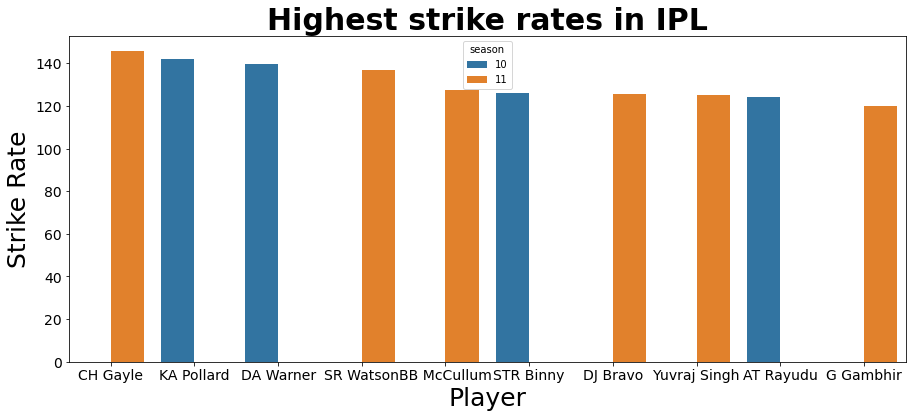

In [34]:
plt.figure(figsize = (15,6))
sns.barplot(x='batsman', y='strike_rate', data = highest_strike_rate.head(10), hue = 'season')
plt.title("Highest strike rates in IPL",fontsize= 30, fontweight = 'bold')
plt.xlabel("Player", size = 25)
plt.ylabel("Strike Rate", size = 25)
plt.xticks(size = 14)
plt.yticks(size = 14)

- AB de Villiers, Gayle have the highest strike rates in IPL. They are the big hitters and can win any match on their day
- One surprise here is that Harbhajan Singh who is a bowler has a strike rate of 130+ and comes before Rohit Sharma in ranking

## __ Bowlers with maximum number of extras. __

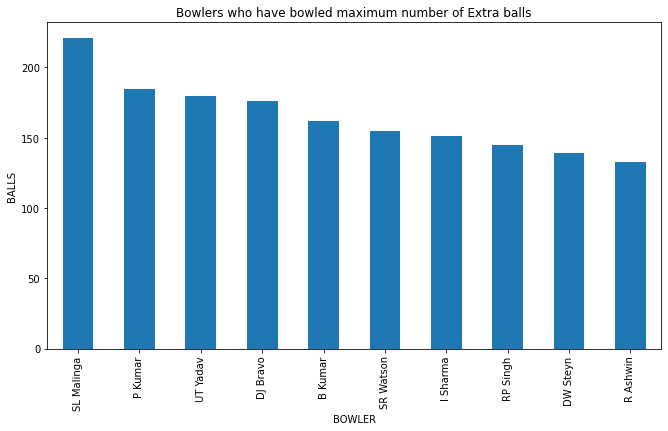

,SL Malinga,P Kumar,UT Yadav,DJ Bravo,B Kumar,SR Watson,I Sharma,RP Singh,DW Steyn,R Ashwin
bowler,221,185,180,176,162,155,151,145,139,133


In [35]:
extra = deliveries[deliveries['extra_runs']!=0]['bowler'].value_counts()[:10]
extra.plot(kind='bar', figsize=(11,6), title='Bowlers who have bowled maximum number of Extra balls')

plt.xlabel('BOWLER')
plt.ylabel('BALLS')
plt.show()

extra = pd.DataFrame(extra)
extra.T

### Which bowlers have picked up wickets more frequently?

In [36]:
#strike_rate = balls bowled by wickets taken
balls_bowled = pd.DataFrame(merge.groupby('bowler')['ball'].count())
wickets_taken = pd.DataFrame(merge[merge['dismissal_kind'] != 'no dismissal'].groupby('bowler')['dismissal_kind'].count())
seasons_played = pd.DataFrame(merge.groupby('bowler')['season'].nunique())
bowler_strike_rate = pd.DataFrame({'balls':balls_bowled['ball'],'wickets':wickets_taken['dismissal_kind'],
                          'season':seasons_played['season']})
bowler_strike_rate.reset_index(inplace = True)

In [37]:

bowler_strike_rate['strike_rate'] = bowler_strike_rate['balls']/bowler_strike_rate['wickets']
def highlight_cols(s):
    color = 'skyblue'
    return 'background-color: %s' % color
#Strike rate for bowlers who have taken more than 50 wickets
best_bowling_strike_rate = bowler_strike_rate[bowler_strike_rate['wickets'] > 50].sort_values(by = 'strike_rate', ascending = True)
best_bowling_strike_rate.head().style.applymap(highlight_cols, subset=pd.IndexSlice[:, ['bowler', 'wickets','strike_rate']])

,bowler,balls,wickets,season,strike_rate
134,Imran Tahir,1249,82,6,15.231707
340,SL Malinga,2974,188,9,15.819149
93,DJ Bravo,2711,168,10,16.136905
9,A Nehra,1974,121,9,16.314050
225,MM Patel,1382,82,7,16.853659


## Q1. As a sports analysts, The most successful teams, players & factors contributing win or loss of a team:
* Mumbai Indians is the most successful team in IPL and has won the most number of toss.
* There were more matches won by chasing the total(419 matches) than defending(350 matches).
* When defending a total, the biggest victory was by 146 runs(Mumbai Indians defeated Delhi Daredevils by 146 runs on 06 May 2017 at Feroz Shah Kotla stadium, Delhi).
* When chasing a target, the biggest victory was by 10 wickets(without losing any wickets) and there were 11 such instances.
* The Mumbai city has hosted the most number of IPL matches.
* Chris Gayle has won the maximum number of player of the match title.
* S. Ravi(Sundaram Ravi) has officiated the most number of IPL matches on-field.
* Eden Gardens has hosted the maximum number of IPL matches.
* If a team wins a toss choose to field first as it has highest probablity of winning

## Q2. Teams or Players a company should endorse for its products.
* If the franchise is looking for a consistant batsman who needs to score good amount of runs then go for V Kohli, S Raina, Rohit Sharma , David Warner...
* If the franchise is looking for a game changing batsman then go for Chris Gayle, AB deVillers, R Sharma , MS Dhoni...
* If the franchise is looking for a batsman who could score good amount of runs every match the go for DA Warner, CH Gayle, V Kohli,AB de Villiers,S Dhawan
* If the franchise needs the best finisher in lower order having good strike rate then go for CH Gayle,KA Pollard, DA Warner,SR Watson,BB McCullum
* If the franchise need a experienced bowler then go for Harbhajan Singh ,A Mishra,PP Chawla ,R Ashwin,SL Malinga,DJ Bravo
* If the franchise need a wicket taking bowler then go for SL Malinga,DJ Bravo,A Mishra ,Harbhajan Singh, PP Chawla
* If the franchise need a bowler bowling most number of dot balls then go for Harbhajan Singh,SL Malinga,B Kumar,A Mishra,PP Chawla
* If the franchise need a bowler with good economy then go for DW Steyn ,M Muralitharan ,R Ashwin,SP Narine ,Harbhajan Singh
